In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 1.
# Introduction to geospatial data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) Geographic and projected coordinate systems
# (2) Vector and raster data types: basic examples
# (3) Practice with vector data: geometry, attributes, spatial relations, spatial and attribute joins

### Esempio 3: dati di tipo vettoriale, a partire dallo shape file dei comuni 2020 della Lombardia

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Exercise 3.
# Explore, display, work with vector data
#
# https://geopandas.org/index.html
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# You should have already downloaded the necessary dataset:
# Source: http://www.geoportale.regione.lombardia.it


In [1]:
# Import libraries

import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Set the filepath and load the shapefile as a geopandas dataframe; explore

shapefile = './regione_lomb_1/Comuni_2020_poligonali.shp'
# gli shapefile sono un dato di tipo vettoriale molto comune

#comuni = gpd.read_file(shapefile)
comuni = gpd.GeoDataFrame.from_file(shapefile)

print(comuni.head())

# il campo geometry contiene il dato georefernziato

                               CLASSREF BELFIORE COD_ISTATN  \
0  0570159f-0e0f-4edd-824c-23388d03a009     I276   03018144   
1  560529b7-af1e-4dee-a47b-8dd8541bc6b6     D367   03015101   
2  f3df939e-5fb6-4ccb-b040-bcfc0ee5b550     E608   03018082   
3  1274f1c9-79a2-40a4-8e4b-9e18bb967257     A849   03108009   
4  2eb51e8c-a2ce-418d-ba5e-ec32d2b3f219     L778   03017196   

                NOME_COM  COD_PRO               NOME_PRO SIG_PRO COD_CMO  \
0  SANT`ANGELO LOMELLINA       18                  PAVIA      PV    None   
1                DRESANO       15                 MILANO      MI    None   
2                  LIRIO       18                  PAVIA      PV    None   
3               BIASSONO      108  MONZA E DELLA BRIANZA      MB    None   
4          VEROLAVECCHIA       17                BRESCIA      BS    None   

  NOME_CMO  COD_ASL  ... ANNO   ISTAT LEGGE_ISTI  ATS_COD  \
0     None       12  ...    0   18144       None   030328   
1     None       10  ...    0   15101     

<AxesSubplot:>

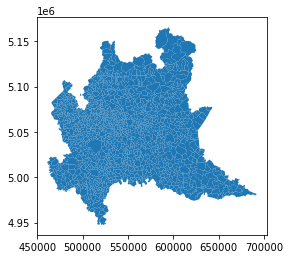

In [5]:
# Now plot the data
# Make the simplest of the plots >>> .plot()

# la mappa contiene i confini comunali di tutti i comuni della Lomabrdia

comuni.plot()

In [4]:
# We have seen two levels of information: 
# (A) shapes and 
# (B) their attributes


# Ci concentriamo inzialmente sugli shapes

# (A) Let's start focussing on the shapes (polygons)

# In the map above, we have numbers on both x & y axes; what do they represent?
# They represent the x,y coordinates. They refer to an origin, in a given coordinate system.

# https://geopandas.org/projections.html#coordinate-reference-systems

# What's the coordinate system of our data ?

comuni.crs  # per capire qual è il sisteam di riferiemento

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 6°E to 12°E - by country
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

D:\Anaconda\envs\env_environment_lab\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

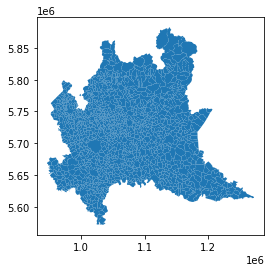

In [5]:
# We can check the CRS codes (and find codes for different projections here) here:
# http://epsg.io/
# https://spatialreference.org/

# Now, let's change the CRS of our data (apply a trasformation), than plot and compare to the previous one. 
# This is different than just using a different CRS for plotting purposes

# For instance: "Google maps" crs
# From the epsg repository we find that this corresponds to the code: 3857

# Let's apply the transformation
# Note how the axes range change

comuni_new = comuni.to_crs({'init': 'epsg:3857'})  
comuni_new.plot()

# abbiamo cambiato il sistema di riferimento

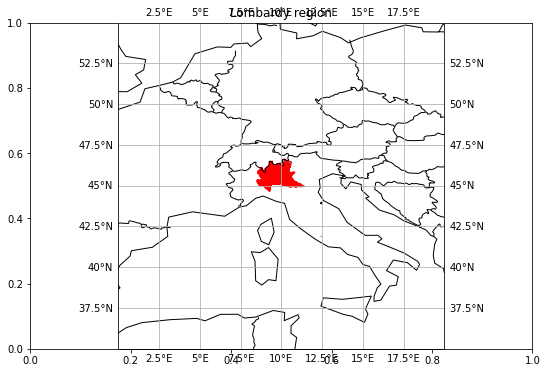

In [8]:
# Let's place Lombardy in a broader context
# Make a more elaborate plot >>> use matplotib & cartopy
# Play with features

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

fig = plt.figure(figsize=(9,6))  # x,y(inches)
plt.title('Lombardy region')

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_global()

#ax.add_geometries(comuni_new['geometry'], crs=ccrs.epsg('3857'), facecolor='red', edgecolor='red')
ax.add_geometries(comuni['geometry'], crs=ccrs.epsg('32632'), facecolor='cyan', edgecolor='red')

ax.set_xlim(0,20) 
ax.set_ylim(35,55)  
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='110m')  # in fact we are loading a shapefile here (110,50m,10m)
#ax.add_feature(cfeature.COASTLINE)

ax.gridlines(draw_labels=True)


In [9]:
# Adesso guardiamo gli attributi del nostro dataframe

# (B) Now let's focus on the attributes

# We have 
# - "typical" pandas-like attributes (strings, numbers, ...)
# - geometry attributes 

# Which and how many provinces are there in Lombardy ?

print(comuni.NOME_PRO.unique())
print(len(comuni.NOME_PRO.unique()))

['PAVIA' 'MILANO' 'MONZA E DELLA BRIANZA' 'BRESCIA' 'LODI' 'BERGAMO'
 'CREMONA' 'MANTOVA' 'SONDRIO' 'LECCO' 'COMO' 'VARESE']
12


<AxesSubplot:>

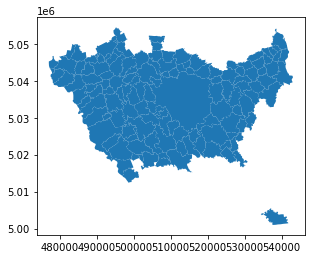

In [10]:
# Just focus on the province of Milano

comuni_milano = comuni[comuni.NOME_PRO=='MILANO']
comuni_milano.plot()

In [11]:
# What's the areal extension of cities in the province of Milano ?

# Let's exploit the geometry of the polygons in out vector data layer
# https://geopandas.org/data_structures.html

# se abbiamo un poligono possiamo calcolare la sua area, il centroide ecc

print(comuni_milano['geometry'].area)

1       3.505868e+06
6       4.923317e+06
27      3.968097e+06
29      5.029254e+06
36      1.199857e+07
            ...     
1440    7.246165e+06
1460    1.657445e+07
1481    1.730485e+07
1485    1.176890e+07
1501    7.070506e+06
Length: 133, dtype: float64


<AxesSubplot:>

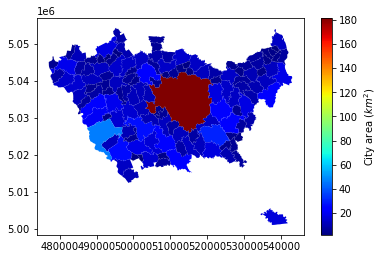

In [12]:
# Let's show this piece of information on a map

comuni_milano.plot(column=comuni_milano['geometry'].area/1e6, cmap='jet', 
                   legend=True, legend_kwds={'label': 'City area ($km^2$)'})

# si calcola l'area sull'attributo geoemtria, dividendo per 1e6 per converitire in m^2/km^2

<AxesSubplot:>

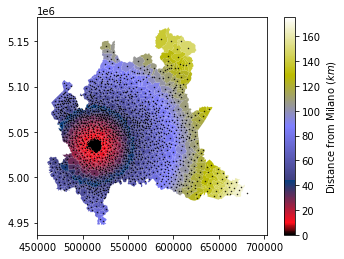

In [13]:
# In geodataframe "comuni" we also have two attributes (SHAPE_AREA, SHAPE_LEN) that are related to geometry.
# In fact we can calculate them ourselves, based on geometry.

# We also have the centroid properties that we can extract to play with:
#  https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.centroid.html?highlight=centroid
#  https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.distance.html

# Let's calculate and plot the distance in km of the centroids of all towns in Lombardy 
#  from the centroid of Milano

comuni['dist_milano'] = comuni.centroid.apply(lambda dm: 
                                              comuni[comuni.NOME_COM=='MILANO'].centroid.distance(dm)/1000)

ax01=comuni.plot(column=comuni['dist_milano'], cmap='gist_stern', 
                 legend=True,legend_kwds={'label': 'Distance from Milano ($km$)'})

comuni.centroid.plot(ax=ax01, color="black", markersize=0.2)


In [14]:
# We can also perform operations such as join or intersect shapes
#  https://geopandas.org/en/stable/docs/reference/geoseries.html

# Let's "dissolve" towns into provinces
#  https://www.earthdatascience.org/workshops/gis-open-source-python/dissolve-polygons-in-python-geopandas-shapely/
#  https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html

# Note that the attributes are carried to the new geodataframe, and "aggfunc" determines how they are treated
# In this case, most of the attributes do not make sense anymore, so we keep only "geometry" and name

province = comuni.dissolve(by='NOME_PRO', as_index=False)[['geometry','NOME_PRO']]
province


,geometry,NOME_PRO
0,"POLYGON ((569694.397 5033928.623, 569666.146 5...",BERGAMO
1,"POLYGON ((606863.723 5007764.439, 606856.264 5...",BRESCIA
2,"MULTIPOLYGON (((514535.867 5056908.059, 514574...",COMO
3,"POLYGON ((611206.034 4988831.264, 611216.541 4...",CREMONA
4,"POLYGON ((534835.773 5055189.378, 534746.574 5...",LECCO
5,"POLYGON ((558641.973 4994977.949, 558647.849 4...",LODI
6,"POLYGON ((627321.302 4975423.609, 627305.060 4...",MANTOVA
7,"MULTIPOLYGON (((541803.470 5001429.362, 541770...",MILANO
8,"POLYGON ((537219.120 5049238.476, 537215.246 5...",MONZA E DELLA BRIANZA
9,"MULTIPOLYGON (((522592.400 4956732.848, 522589...",PAVIA


<AxesSubplot:>

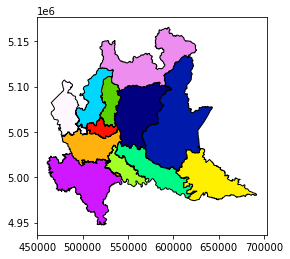

In [15]:
# Let's plot the provinces

province.plot(cmap='gist_ncar', edgecolor='black')

In [16]:
# Now let's add new information in our "comuni" dataframe:
#  we will merge population data from an external table

# Then, let's join it with the geodatabase "comuni"
#  https://geopandas.org/mergingdata.html#

# First, import a data table into a pandas df

tab_pop = pd.read_csv('./Lombardia_Pop2011_2014.csv',sep=',',encoding= 'unicode_escape')
tab_pop

,Codice,Comune,Cod_prov,Provincia,Pop2011,Pop2014
0,3017064,CORZANO,17,BRESCIA,1358.0,1427.0
1,3017167,RUDIANO,17,BRESCIA,5861.0,5822.0
2,3017201,VILLANUOVA SUL CLISI,17,BRESCIA,5855.0,5778.0
3,3017084,IRMA,17,BRESCIA,152.0,128.0
4,3017102,MANERBA DEL GARDA,17,BRESCIA,4985.0,5290.0
...,...,...,...,...,...,...
1526,3012043,CASTELLO CABIAGLIO,12,VARESE,548.0,582.0
1527,3012062,CUVEGLIO,12,VARESE,3443.0,3428.0
1528,3012037,CASALZUIGNO,12,VARESE,1360.0,1336.0
1529,3012038,CASCIAGO,12,VARESE,3916.0,3841.0


In [17]:
# In order to make a join, we need a common field: let that be the town code. 
# Let's rename it in the table so that the attribute names match.

tab_pop.rename(columns={'Codice':'COD_ISTATN'}, inplace=True)

# Now make the join

tab_pop.COD_ISTATN=tab_pop.COD_ISTATN.astype(int)
comuni.COD_ISTATN=comuni.COD_ISTATN.astype(int)
comuni = comuni.merge(tab_pop, on='COD_ISTATN')
print(comuni.head())

                               CLASSREF BELFIORE  COD_ISTATN  \
0  0570159f-0e0f-4edd-824c-23388d03a009     I276     3018144   
1  560529b7-af1e-4dee-a47b-8dd8541bc6b6     D367     3015101   
2  f3df939e-5fb6-4ccb-b040-bcfc0ee5b550     E608     3018082   
3  1274f1c9-79a2-40a4-8e4b-9e18bb967257     A849     3108009   
4  2eb51e8c-a2ce-418d-ba5e-ec32d2b3f219     L778     3017196   

                NOME_COM  COD_PRO               NOME_PRO SIG_PRO COD_CMO  \
0  SANT`ANGELO LOMELLINA       18                  PAVIA      PV    None   
1                DRESANO       15                 MILANO      MI    None   
2                  LIRIO       18                  PAVIA      PV    None   
3               BIASSONO      108  MONZA E DELLA BRIANZA      MB    None   
4          VEROLAVECCHIA       17                BRESCIA      BS    None   

  NOME_CMO  COD_ASL  ...                       CMETR_DEC    SHAPE_AREA  \
0     None       12  ...                            None  1.039710e+07   
1     None